# Copy The Brain Scan Image Dataset of Alzheimer Patient

In [1]:
!git clone "https://github.com/srajan-kiyotaka/Alzheimer-Disease-Prediction"

fatal: destination path 'Alzheimer-Disease-Prediction' already exists and is not an empty directory.


# Store The Images in The List

In [2]:
# import opencv
import cv2

# store list
images = []
lables = []

## AD Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 172):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final AD JPEG/AD ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 240))
    images.append(gray)
    lables.append(0)  # AD

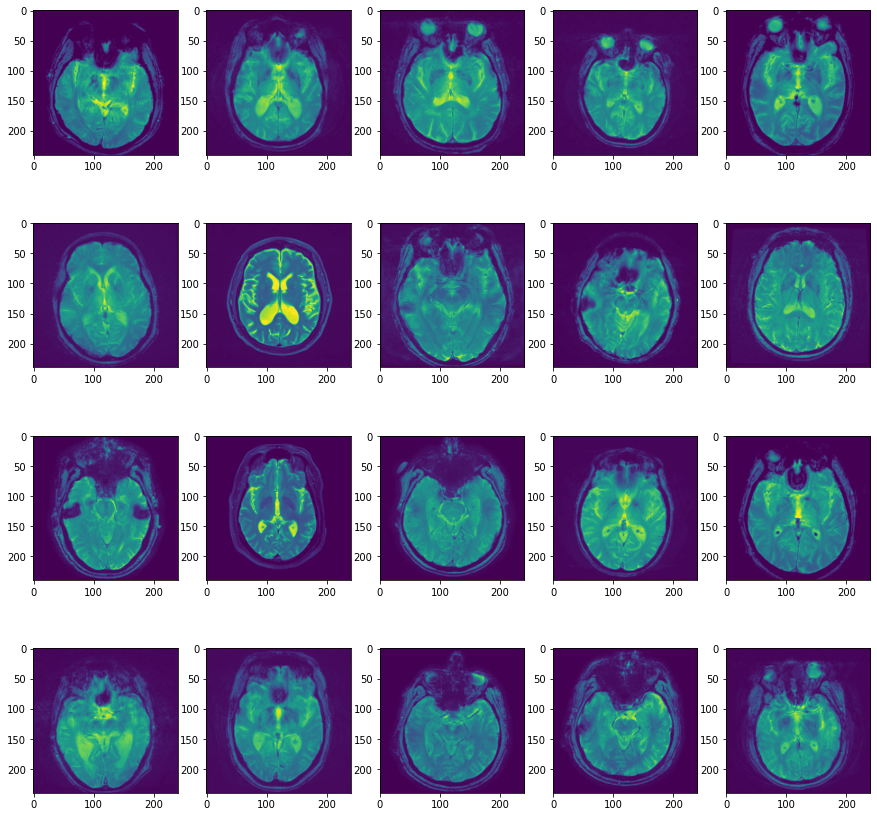

In [3]:
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[10 + i*3])
plt.show()

In [4]:
## CN Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 581):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final CN JPEG/CN ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 240))
    images.append(gray)
    lables.append(1)  # CN

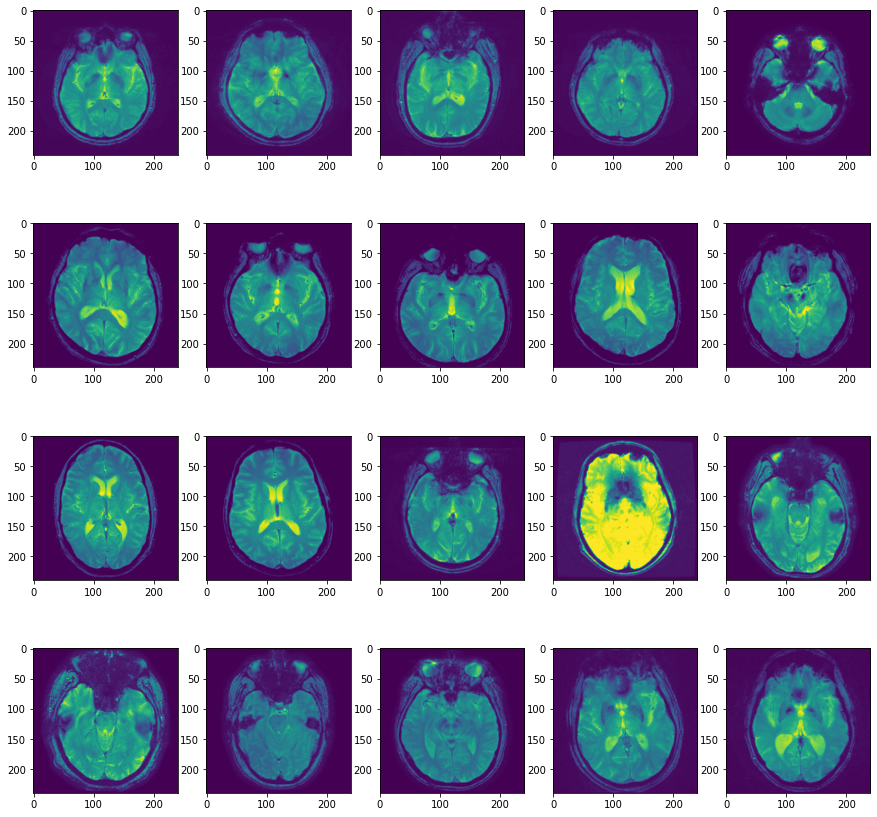

In [5]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[200 + i*3])
plt.show()

In [6]:
## EMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 241):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final EMCI JPEG/EMCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 240))
    images.append(gray)
    lables.append(2)  # EMCI

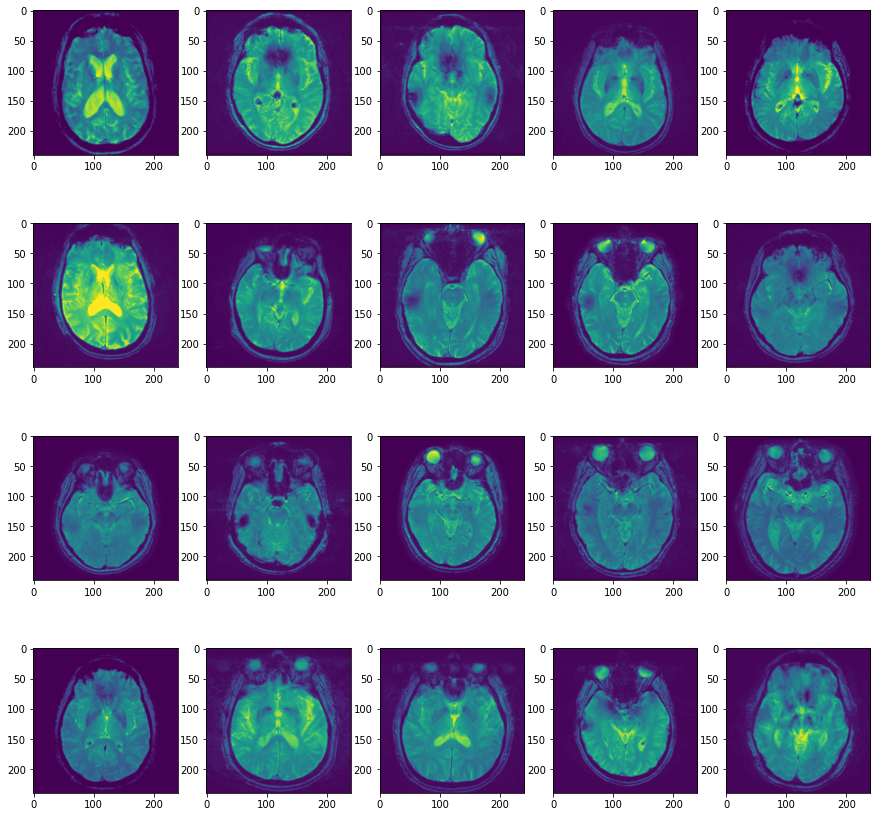

In [7]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[780 + i*3])
plt.show()

In [8]:
## LMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 73):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final LMCI JPEG/LMCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 240))
    images.append(gray)
    lables.append(3)  # LMCI

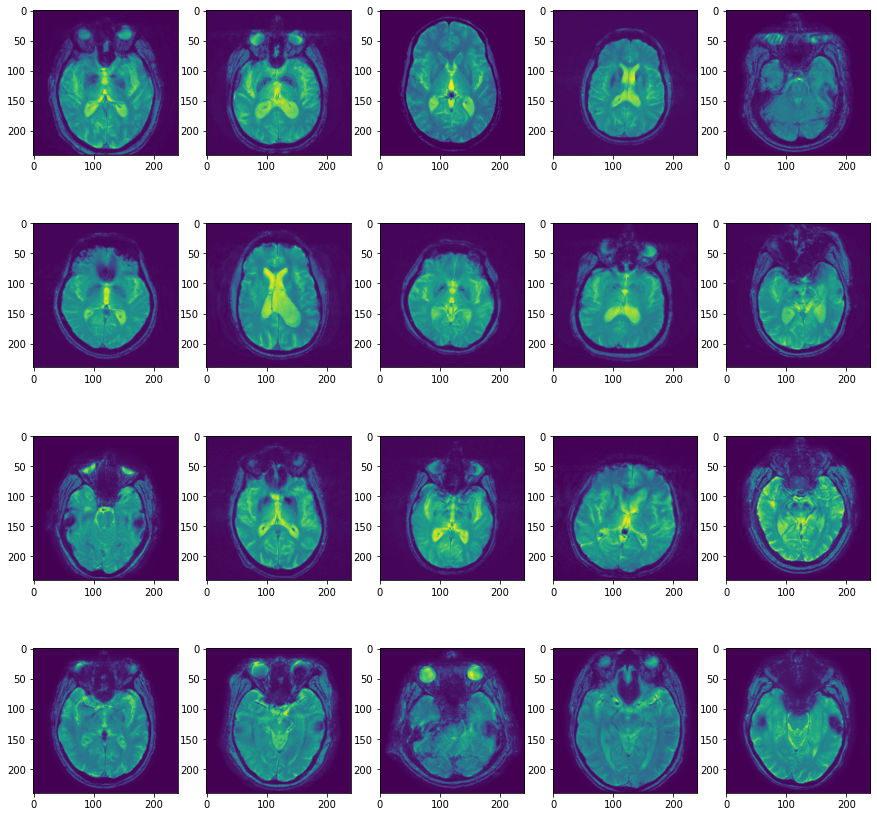

In [9]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[995 + i*3])
plt.show()

In [10]:
## LMCI Patient Brain Scan with PreProcessing of the Image ##
for i in range(1, 234):
    img = cv2.imread(f"/content/Alzheimer-Disease-Prediction/Alzheimers-ADNI/train/Final MCI JPEG/MCI ({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 240))
    images.append(gray)
    lables.append(4)  # MCI

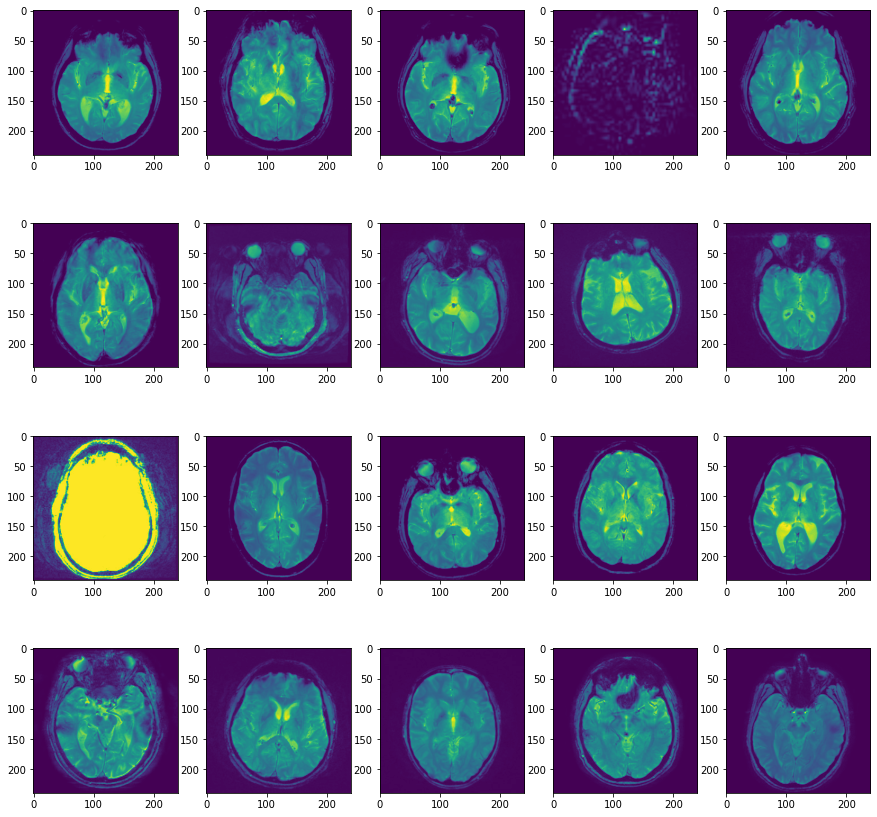

In [11]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[1080 + i*3])
plt.show()

In [12]:
# Shape of the Images

print(f"Shape of each image is = {images[1000].shape}")

Shape of each image is = (240, 240)


In [13]:
# Convert The List into Array Format  #

import numpy as np
train_feature = np.array(images)
lables = np.array(lables)

In [14]:
## Display Array Shape ##

print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (1296, 240, 240)
lable dataset shape = (1296,)


# Split The Dataset into Test and Train

In [15]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(train_feature,lables,test_size=0.175)

print(f"train_features shape = {train_features.shape}")

print(f"test_features shape = {test_features.shape}")

print(f"train_target shape = {train_target.shape}")

print(f"test_target shape = {test_target.shape}")

train_features shape = (1069, 240, 240)
test_features shape = (227, 240, 240)
train_target shape = (1069,)
test_target shape = (227,)


# Deep Learning CNN Model Architecture

In [16]:
# MODEL ARCHITECTURE

import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE NOT ENCODING

train_target = to_categorical(lables)
test_target = to_categorical(test_target)

# MODEL LAYERS

model=Sequential()

# Convolutional Layers

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (240, 240, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='PReLU'))
model.add(Dropout(0.25))
model.add(Dense(250,activation='ELU'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='LeakyReLU'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 75)      750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 75)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 50)      33800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 500)               9

In [17]:
# MODEL COPILE

from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# MODEL FITTING

model.fit(train_feature, train_target, validation_data = (test_features, test_target), shuffle=True, steps_per_epoch = 5, batch_size = 128, epochs = 50)

Epoch 1/50
5/5 [==============================] - 11s 1s/step - loss: 2.2357 - accuracy: 0.3313 - val_loss: 1.4071 - val_accuracy: 0.4846
Epoch 2/50
5/5 [==============================] - 3s 704ms/step - loss: 1.4464 - accuracy: 0.4594 - val_loss: 1.4040 - val_accuracy: 0.4846
Epoch 3/50
5/5 [==============================] - 4s 706ms/step - loss: 1.4164 - accuracy: 0.4621 - val_loss: 1.4067 - val_accuracy: 0.4846
Epoch 4/50
5/5 [==============================] - 3s 702ms/step - loss: 1.4192 - accuracy: 0.4422 - val_loss: 1.4152 - val_accuracy: 0.4846
Epoch 5/50
5/5 [==============================] - 3s 585ms/step - loss: 1.4364 - accuracy: 0.4394 - val_loss: 1.4054 - val_accuracy: 0.4846
Epoch 6/50
5/5 [==============================] - 3s 702ms/step - loss: 1.3861 - accuracy: 0.4688 - val_loss: 1.3972 - val_accuracy: 0.4846
Epoch 7/50
5/5 [==============================] - 3s 585ms/step - loss: 1.4267 - accuracy: 0.4394 - val_loss: 1.4024 - val_accuracy: 0.4846
Epoch 8/50
5/5 [======